In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from google.colab import drive
drive.mount('/content/drive/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/project"

 dog.jpeg  'Simple Model.pt'


In [ ]:
import sys
x=sys.path.insert(0,"/content/drive/MyDrive/project")

In [ ]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot
from PIL import Image
import glob
import os, os.path
imageNetModel = torchvision.models.resnet18(pretrained = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
for module in imageNetModel.modules():
  print(module)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 3, padding = "same")
        self.relu1 = F.relu
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(p = 0.3)

        self.conv2 = nn.Conv2d(32, 64, 3, padding = "same",bias=False)
        self.relu2 = F.relu
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(p = 0.3)

        self.conv3 = nn.Conv2d(64, 128, 3, padding = "same",bias=False)
        self.relu3 = F.relu
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(p = 0.4)

        self.conv4 = nn.Conv2d(128, 256, 3, padding = "same",bias=False)
        self.relu4 = F.relu
        self.pool4 = nn.MaxPool2d(2, 2)
        self.dropout4 = nn.Dropout(p = 0.4)


        self.conv5 = nn.Conv2d(256, 512, 3, padding = "same", bias=False)
        self.relu5 = F.relu
        self.pool5 = nn.MaxPool2d(2, 2)
        self.dropout5 = nn.Dropout(p = 0.4)

        self.flatten = nn.Flatten()

        self.linear1 = nn.Linear(512, 80)
        self.relu6 = F.relu
        self.dropout6 = nn.Dropout(p = 0.3)

        self.linear2 = nn.Linear(80, 20)


        

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.dropout1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.dropout2(x)

        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool3(x)
        x = self.dropout3(x)

        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool4(x)
        x = self.dropout4(x)

        x = self.conv5(x)
        x = self.relu5(x)
        x = self.pool5(x)
        x = self.dropout5(x)

        x = self.flatten(x)

        x = self.linear1(x)
        x = self.relu6(x)
        x = self.dropout6(x)

        x = self.linear2(x)
        
        return x 


In [ ]:
simpleModel=torch.load('/content/drive/MyDrive/project/Simple Model.pt')
simpleModel.eval()

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout3): Dropout(p=0.4, inplace=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout4): Dropout(p=0.4, inplace=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (pool5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout

In [ ]:
k=[]
for module in simpleModel.modules():
  k.append(module)
last_layer=k[-7]
print(last_layer)




Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)


In [ ]:
k=[]
for module in imageNetModel.modules():
  k.append(module)
last_layer=k[-52]
print(last_layer)

Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)


In [ ]:
w1=[]
w2=[]
k1=[]
for module in simpleModel.modules():
  k1.append(module)
print(k1[-7])

k2=[]
for module in imageNetModel.modules():
  k2.append(module)
print(k2[-52])

for param in k1[-7].parameters():
      w1.append(param)
      for param in k2[-52].parameters():
        w2.append(param)

s=0
for i in range(10000):
  i=torch.randint(512,(1,))
  j=torch.randint(256,(1,))
  k=torch.randint(64,(1,))
  l=torch.randint(64,(1,))
  num=torch.sum(torch.mul(w1[0][i,j,:,:],w2[0][k,l,:,:]))
  den=torch.sqrt(torch.sum(w1[0][i,j,:,:]*w1[0][i,j,:,:]))*torch.sqrt(torch.sum(w2[0][k,l,:,:]*w2[0][k,l,:,:]))
  res=abs(num)/den
  s+=res
print(s/10000)

Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
tensor(0.2871, grad_fn=<DivBackward0>)


In [ ]:

s1=0
s2=0
w1=[]
w2=[]
k1=[]
for module in simpleModel.modules():
  k1.append(module)
print(k1[-7])

k2=[]
for module in imageNetModel.modules():
  k2.append(module)
print(k2[-4])

for param in k1[-7].parameters():
      w1.append(param)
      for param in k2[-4].parameters():
        w2.append(param)

kl=torch.nn.KLDivLoss(reduction='mean')
for i in range(1000):
  i=torch.randint(512,(1,))
  j=torch.randint(256,(1,))
  k=torch.randint(512,(1,))
  l=torch.randint(256,(1,))
  val1=w1[0][i,j,:,:]
  val2=w2[0][k,l,:,:]
  avg1=torch.mean(val1,1)
  avg2=torch.mean(val2,1)
  s1+=avg1
  s2+=avg2
x1=s1/1000
x2=s2/1000
res=kl(x1,x2)
print(res)

Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
tensor(-0.0024, grad_fn=<MeanBackward0>)


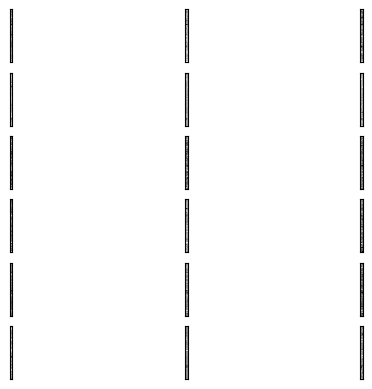

In [ ]:
k=[]
for module in imageNetModel.modules():
  k.append(module)
last_layer=k[-52]
filters =last_layer.weight.detach().cpu().numpy()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[i, :, :, :]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
pyplot.show()

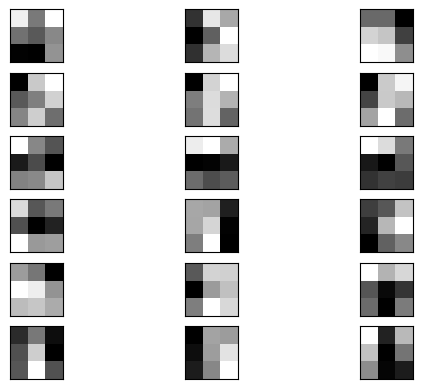

In [ ]:
k=[]
for module in simpleModel.modules():
  k.append(module)
last_layer=k[-19]
filters =last_layer.weight.detach().cpu().numpy()
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
n_filters, ix = 6, 1
for i in range(n_filters):
    f = filters[i, :, :, :]
    for j in range(3):
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
pyplot.show()

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0., std=1.)
])

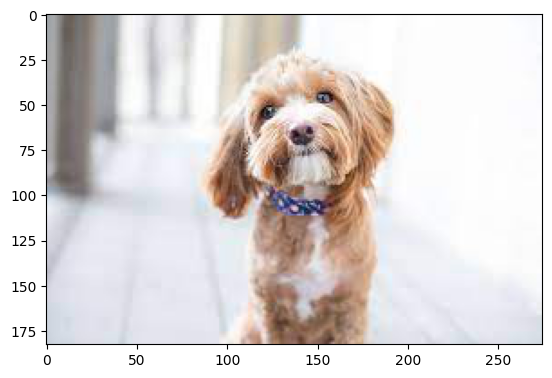

In [ ]:
image = Image.open("/content/drive/MyDrive/project/dog.jpeg")
pyplot.imshow(image)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model1 = imageNetModel.to(device)
model2 = simpleModel.to(device)

In [ ]:
image = transform(image)
print(f"Image shape before: {image.shape}")
image = image.unsqueeze(0)
print(f"Image shape after: {image.shape}")
image = image.to(device)

Image shape before: torch.Size([3, 224, 224])
Image shape after: torch.Size([1, 3, 224, 224])


In [ ]:
model_weights =[]
conv_layers = []
model_children = list(model1.children())
counter = 0
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print(conv_layers)

Total convolution layers: 17
[Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False), Conv2d(256

In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

17
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 64, 112, 112])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 128, 56, 56])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 256, 28, 28])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])
torch.Size([1, 512, 14, 14])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(112, 112)
(112, 112)
(112, 112)
(112, 112)
(112, 112)
(56, 56)
(56, 56)
(56, 56)
(56, 56)
(28, 28)
(28, 28)
(28, 28)
(28, 28)
(14, 14)
(14, 14)
(14, 14)
(14, 14)


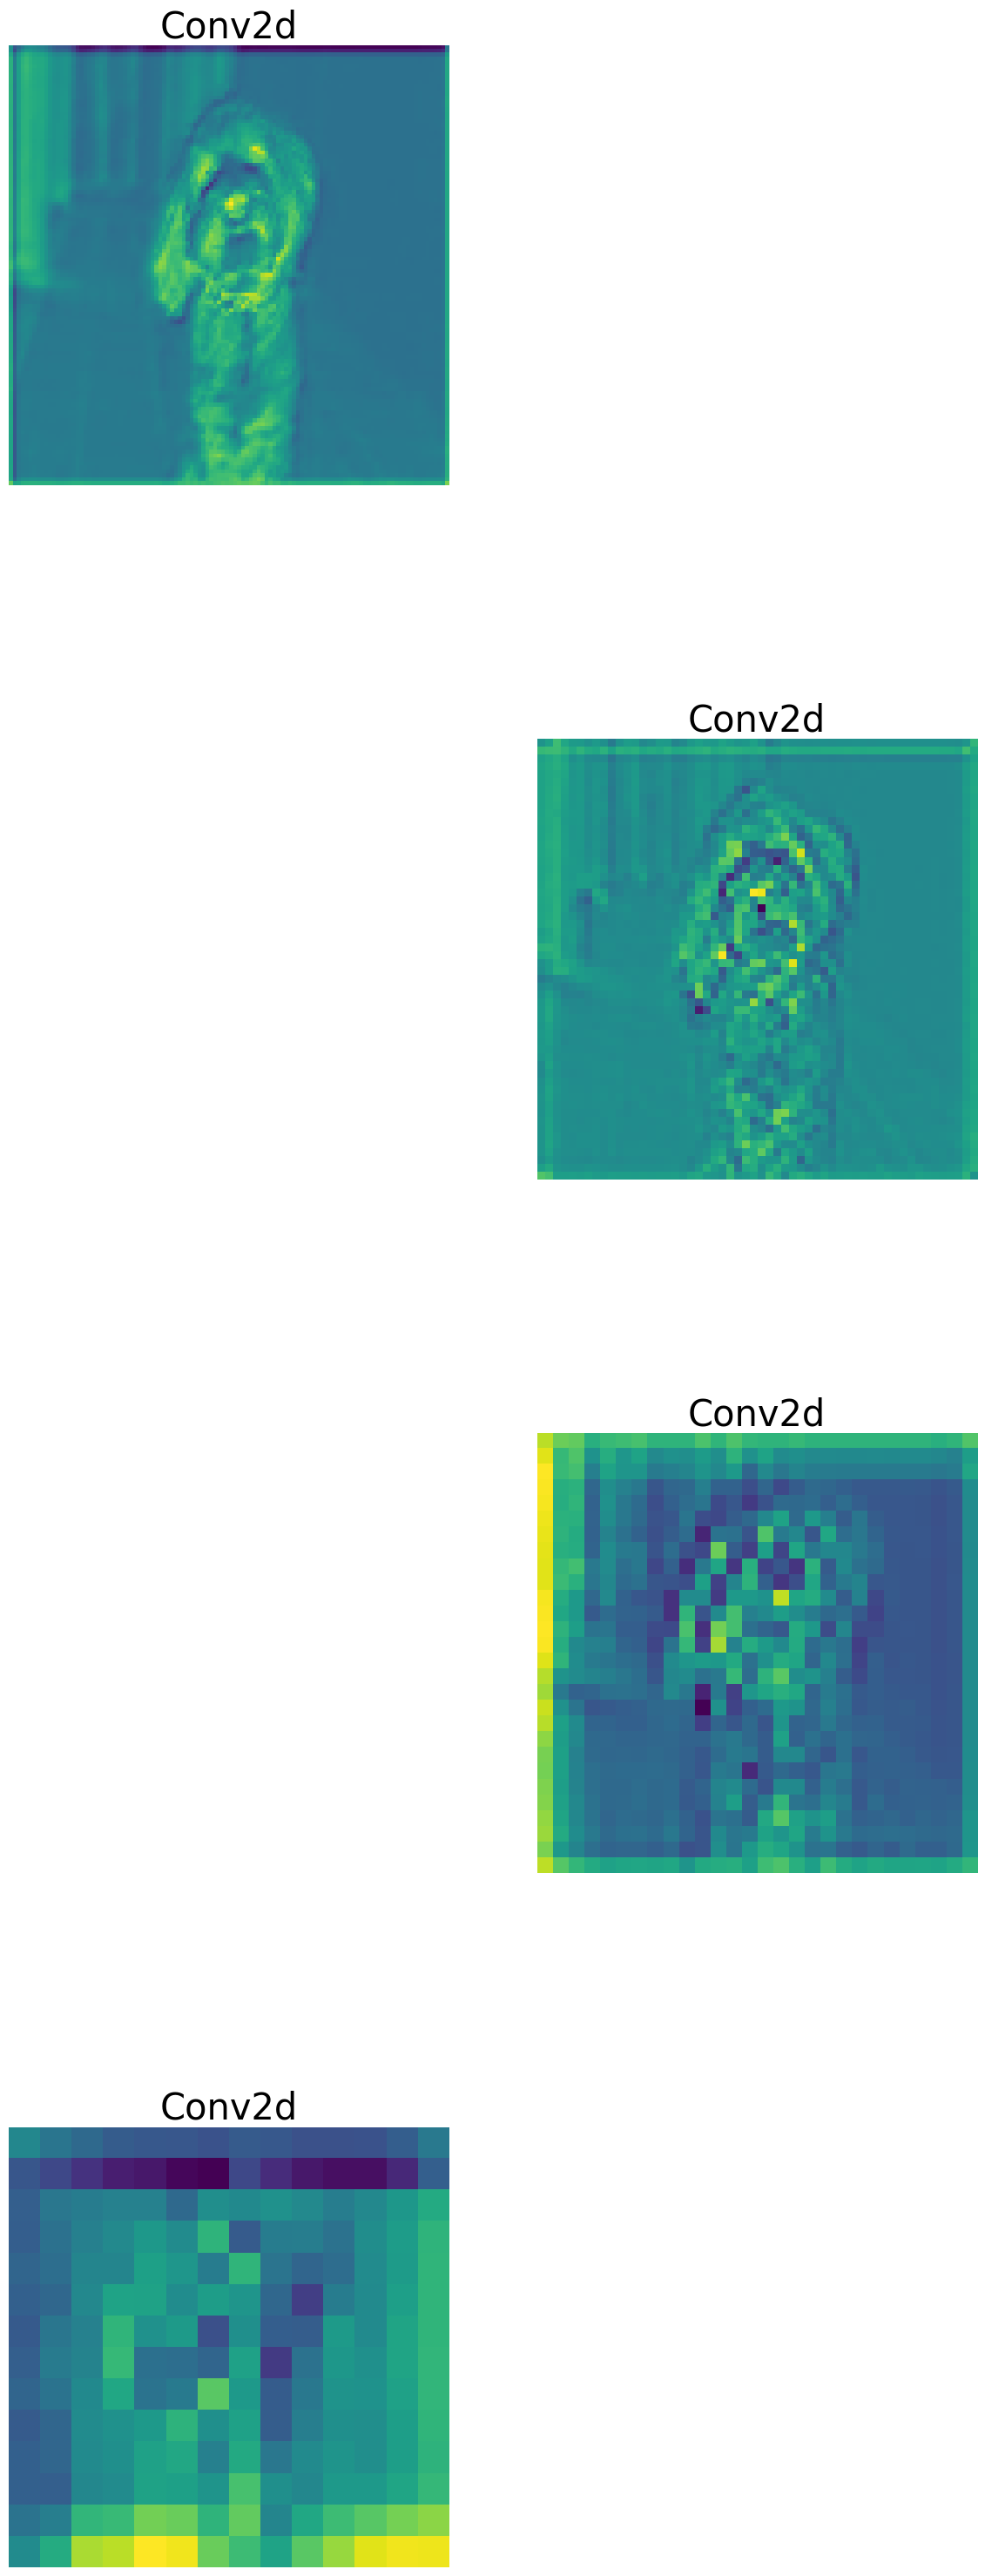

In [ ]:
fig = pyplot.figure(figsize=(30, 50))
k=0
for i in range(len(processed)):
    k+=1
    if k==2 or k==7 or k==11 or k==14:
      a = fig.add_subplot(5, 4, i+1)
      imgplot = pyplot.imshow(processed[i])
      a.axis("off")
      a.set_title(names[i].split('(')[0], fontsize=30)

In [ ]:
model_weights =[]
conv_layers = []
model_children = list(model2.children())
counter = 0
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter+=1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter+=1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolution layers: {counter}")
print(conv_layers)

Total convolution layers: 5
[Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same), Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same), Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same), Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=same), Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)]


In [ ]:
outputs = []
names = []
for layer in conv_layers[0:]:
    image = layer(image)
    outputs.append(image)
    names.append(str(layer))
print(len(outputs))
#print feature_maps
for feature_map in outputs:
    print(feature_map.shape)

5
torch.Size([1, 32, 224, 224])
torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 224, 224])
torch.Size([1, 256, 224, 224])
torch.Size([1, 512, 224, 224])


In [ ]:
processed = []
for feature_map in outputs:
    feature_map = feature_map.squeeze(0)
    gray_scale = torch.sum(feature_map,0)
    gray_scale = gray_scale / feature_map.shape[0]
    processed.append(gray_scale.data.cpu().numpy())
for fm in processed:
    print(fm.shape)

(224, 224)
(224, 224)
(224, 224)
(224, 224)
(224, 224)


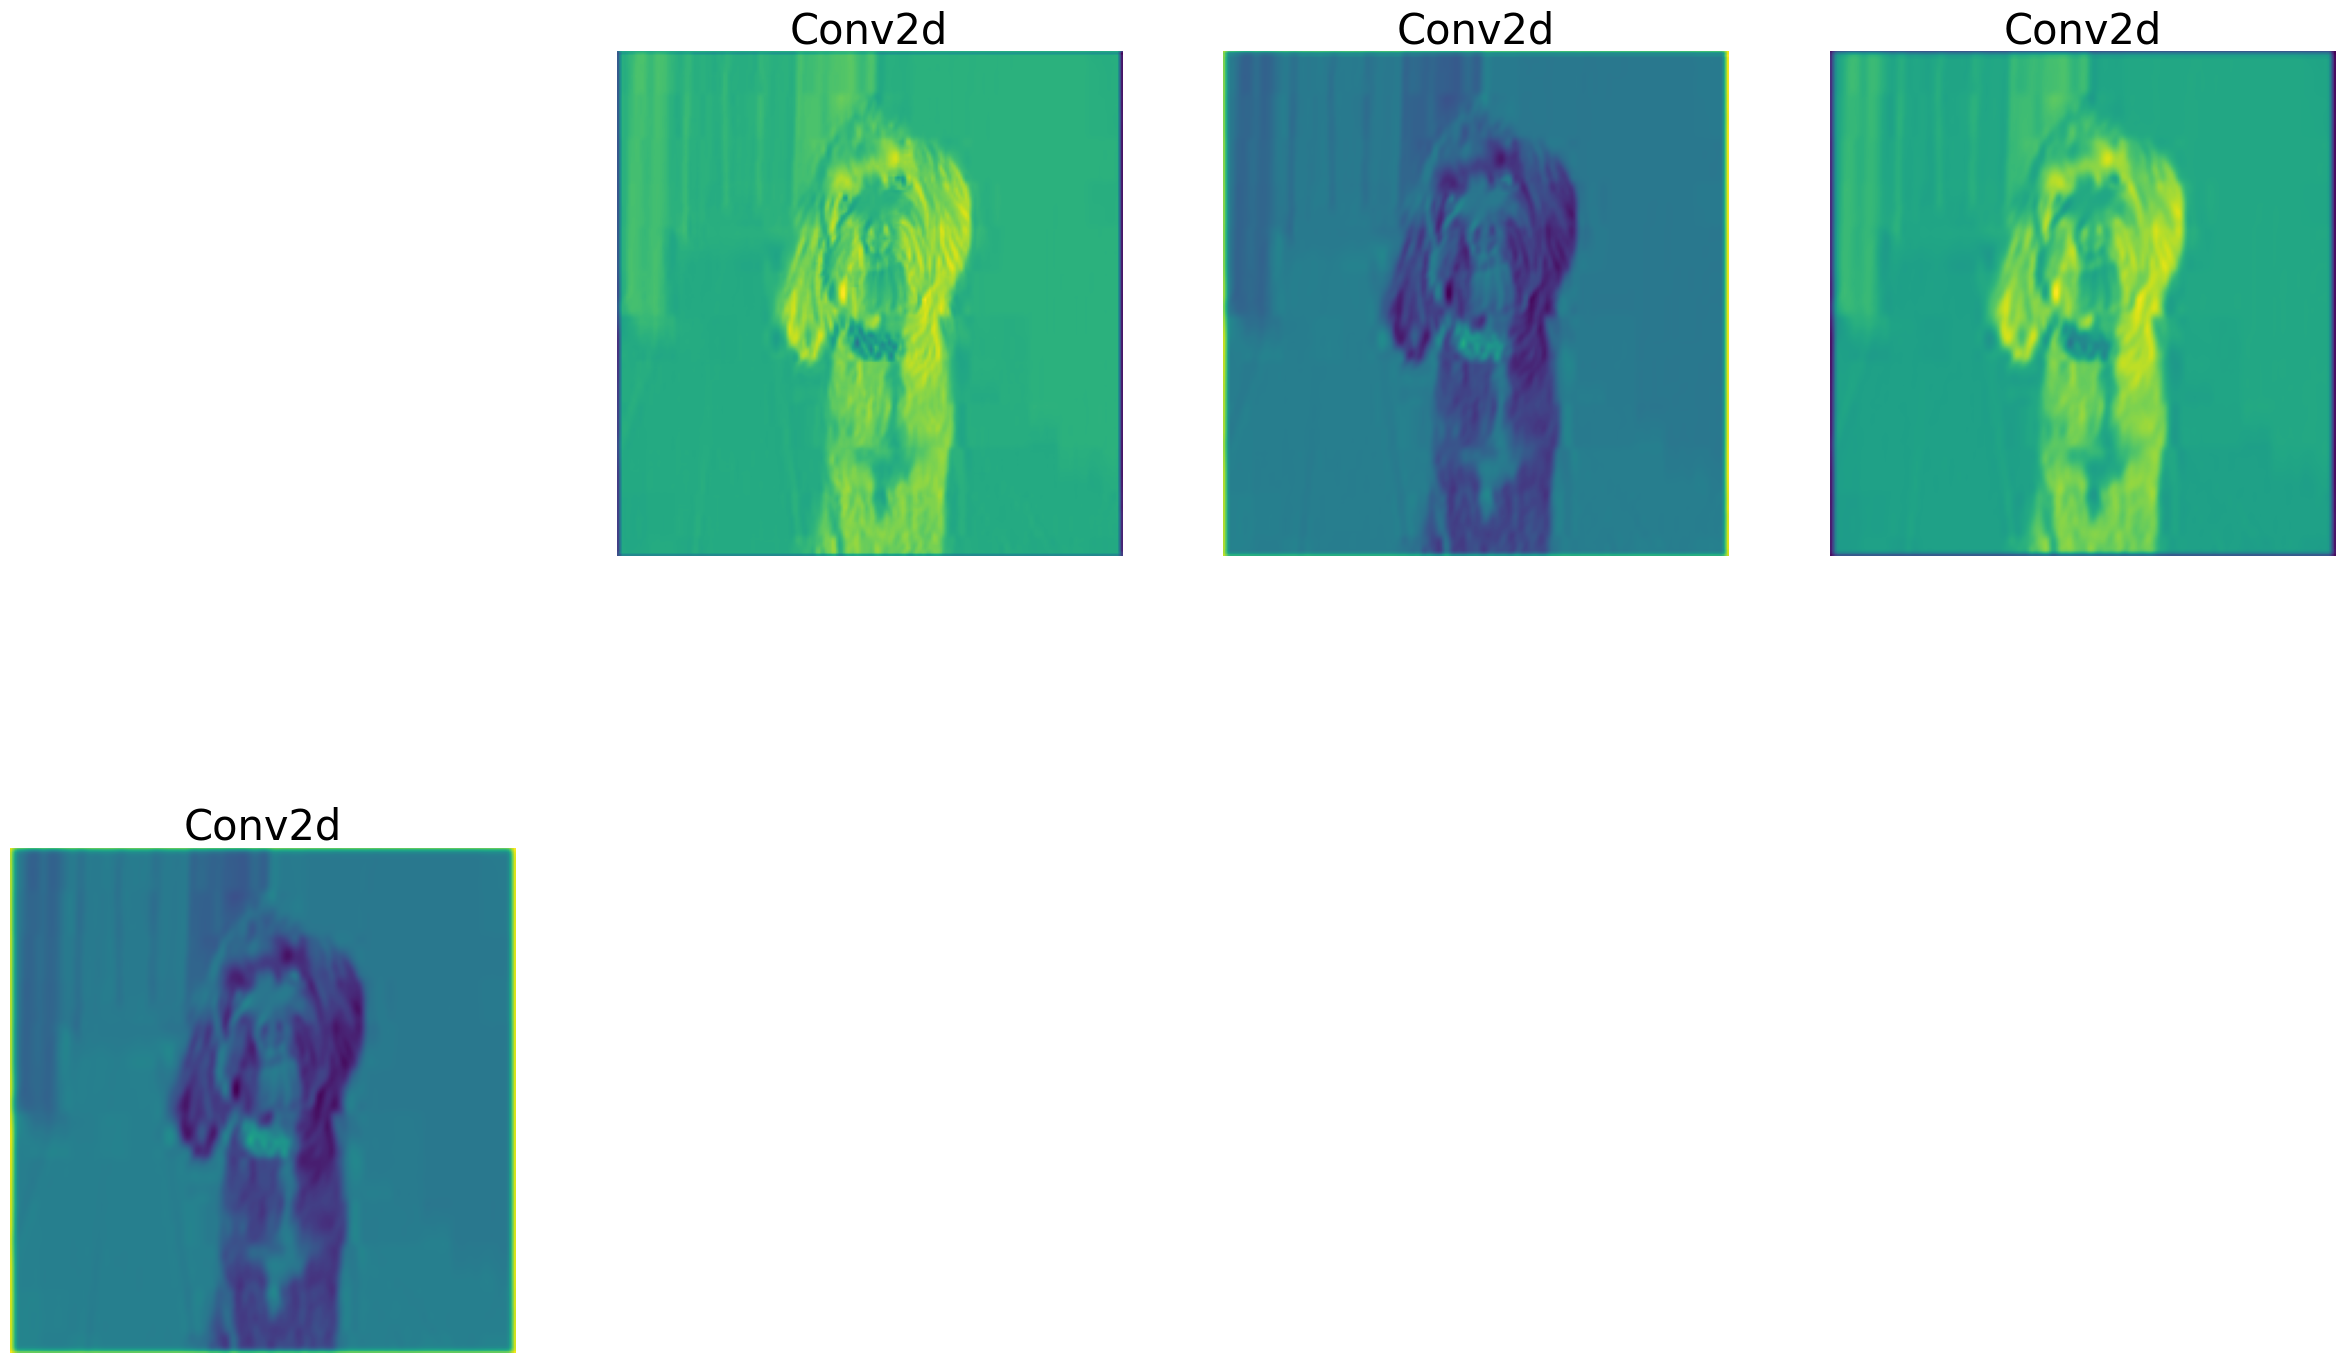

In [ ]:
fig = pyplot.figure(figsize=(30, 50))
k=0
for i in range(len(processed)):
    k+=1
    if k==2 or k==3 or k==4 or k==5:
      a = fig.add_subplot(5, 4, i+1)
      imgplot = pyplot.imshow(processed[i])
      a.axis("off")
      a.set_title(names[i].split('(')[0], fontsize=30)